### Chapter 6 from “Genetic Algorithms and Investment Strategies” by Richard Bauer Jr

---

In [1]:
import random
import numpy as np

from deap import base, creator, tools

In [2]:
def EOQ(individual):
    
    def to_int(b):
        return int(b, 2)
    
    O = 350000
    T = 600000
    
    i = to_int(
        ''.join((str(xi) for xi in individual)))
    
    if i == 0:
        return (-1)*O
    
    f = round((20000 / i) * 6000, 0)
    v = (i * 6) / 2
    
    return T - ( (f + v) + (O) ),

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [4]:
tbx = base.Toolbox()

In [5]:
INDIVIDUAL_SIZE = 20

tbx.register("attr_int", random.randint, 0, 1)
tbx.register("individual", 
             tools.initRepeat, 
             creator.Individual,
             tbx.attr_int, 
             n=INDIVIDUAL_SIZE)

tbx.register("population", tools.initRepeat, list, tbx.individual)

In [6]:
tbx.register("evaluate", EOQ)

tbx.register("mate", tools.cxOnePoint)
tbx.register("mutate", tools.mutFlipBit, indpb=0.01)
tbx.register("select", tools.selTournament, tournsize=5)

In [7]:
def set_fitness(population):
    fitnesses = [ 
        (individual, tbx.evaluate(individual)) 
        for individual in population 
    ]

    for individual, fitness in fitnesses:
        individual.fitness.values = fitness
        
def pull_stats(population, iteration=1):
    fitnesses = [ individual.fitness.values[0] for individual in population ]
    return {
        'i': iteration,
        'mu': np.mean(fitnesses),
        'std': np.std(fitnesses),
        'max': np.max(fitnesses),
        'min': np.min(fitnesses)
    }

In [8]:
## create random population,
population = tbx.population(n=50)

## set fitness,
set_fitness(population)

In [9]:
## quick look at the initial population,
population[:5]

[[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
 [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
 [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]]

In [10]:
## globals,
stats = []

In [11]:
iteration = 1
while iteration < 51:
    
    current_population = list(map(tbx.clone, population))
    
    offspring = []
    for _ in range(10):
        i1, i2 = np.random.choice(range(len(population)), size=2, replace=False)

        offspring1, offspring2 = \
            tbx.mate(population[i1], population[i2])

        offspring.append(tbx.mutate(offspring1)[0])
        offspring.append(tbx.mutate(offspring2)[0])  
    
    for child in offspring:
        current_population.append(child)

    ## reset fitness,
    set_fitness(current_population)

    population[:] = tbx.select(current_population, len(population))
    
    ## set fitness on individuals in the population,
    stats.append(
        pull_stats(population, iteration))
    
    iteration += 1

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

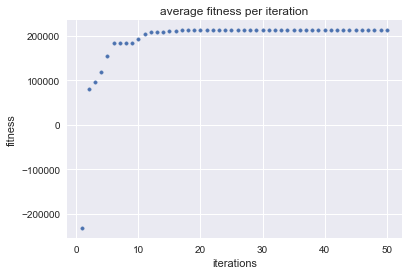

In [13]:
_ = plt.scatter(range(1, len(stats)+1), [ s['mu'] for s in stats ], marker='.')

_ = plt.title('average fitness per iteration')
_ = plt.xlabel('iterations')
_ = plt.ylabel('fitness')

plt.show()

In [14]:
def to_int(b):
    return int(b, 2)
    
sorted([ (i, to_int(''.join((str(xi) for xi in individual)))) for i, individual in enumerate(population) ][:10], key=lambda x: x[1], reverse=False)

[(1, 6309),
 (2, 6309),
 (3, 6309),
 (4, 6309),
 (5, 6309),
 (6, 6309),
 (7, 6309),
 (8, 6309),
 (9, 6309),
 (0, 6316)]